In [4]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import pandas_datareader.data as web

from yahoo_fin import options
import yahoo_fin.stock_info as si

In [5]:
SMALL_SIZE = 12+2
MEDIUM_SIZE = 14+2
BIGGER_SIZE = 16+2

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE-2)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


In [6]:
msft = yf.Ticker('msft')
dates = msft.options
dates
#dates[0]
#msft.options[0]
#msft

()

In [8]:
from datetime import datetime
current_datetime = datetime.now().strftime("%Y-%m-%d %H-%M-%S")

current_datetime

'2024-01-24 19-41-15'

In [9]:
# symbols = ['SPY', 'ASML', 'META', 'AMZN', 'BABA', 'GOOGL', 'NXPI']
symbols= ['acmr', 'adbe','alb', 'AMD', 'ARM', 'AVGO', 'crwd', 'etsy', 'fslr', 'FTNT', 'googl', 'meta', 'msft', 'nflx', 'NVDA', 'panw', 'plug', 'pypl',  
          'qcom', 'smci', 'tsla', 'ulta' ]
#symbols = ['spy']
for symbol in symbols:
    df = yf.Ticker(symbol)
    date = df.options[0]
    cmp = si.get_live_price(symbol)

    opt = df.option_chain(date)

    plt.figure(figsize=(25, 15), dpi=200)

    diff = 20
    i = np.abs(opt.calls['strike'] - cmp).idxmin()
    size_ = opt.calls['strike'].size

    if i + diff >= size_:
        b = size_ - 1
    else:
        b = i + diff

    if i - diff <= 0:
        a = 0
    else:
        a = i - diff

    plt.xticks(opt.calls['strike'], fontsize=20, rotation=90)
    plt.yticks(fontsize=20)
    plt.xlim(opt.calls['strike'][a], opt.calls['strike'][b])
    plt.axvline(x=cmp, color='black')

    # Create the first y-axis for Open Interest
    plt.bar(opt.calls['strike'], opt.calls['openInterest'], label='Call-resistance', color='red')
    plt.bar(opt.puts['strike'], opt.puts['openInterest'], label='Put-support', alpha=0.3, color='green')
    
    plt.legend(fontsize=20, loc = 'upper left')
    
    plt.xlabel('Strike price')
    plt.ylabel('Open Interest')

    # Create the second y-axis for Volume
    ax2 = plt.gca().twinx()
    ax2.scatter(opt.calls['strike'], opt.calls['volume'], marker='o', s = 100, label='Call-resistance-v', color='b')
    ax2.scatter(opt.puts['strike'], opt.puts['volume'], marker='D', s = 100, label='Put-support-v', color='k')

    plt.legend(fontsize=20)

    plt.grid(linestyle='dotted', which='minor')
    plt.grid(which='major')
    plt.minorticks_on()

    plt.title(f'{symbol} _ {date}', weight='bold')

   
    plt.savefig(f'./{current_datetime} {symbol}.jpg')
    
    plt.show()

IndexError: tuple index out of range

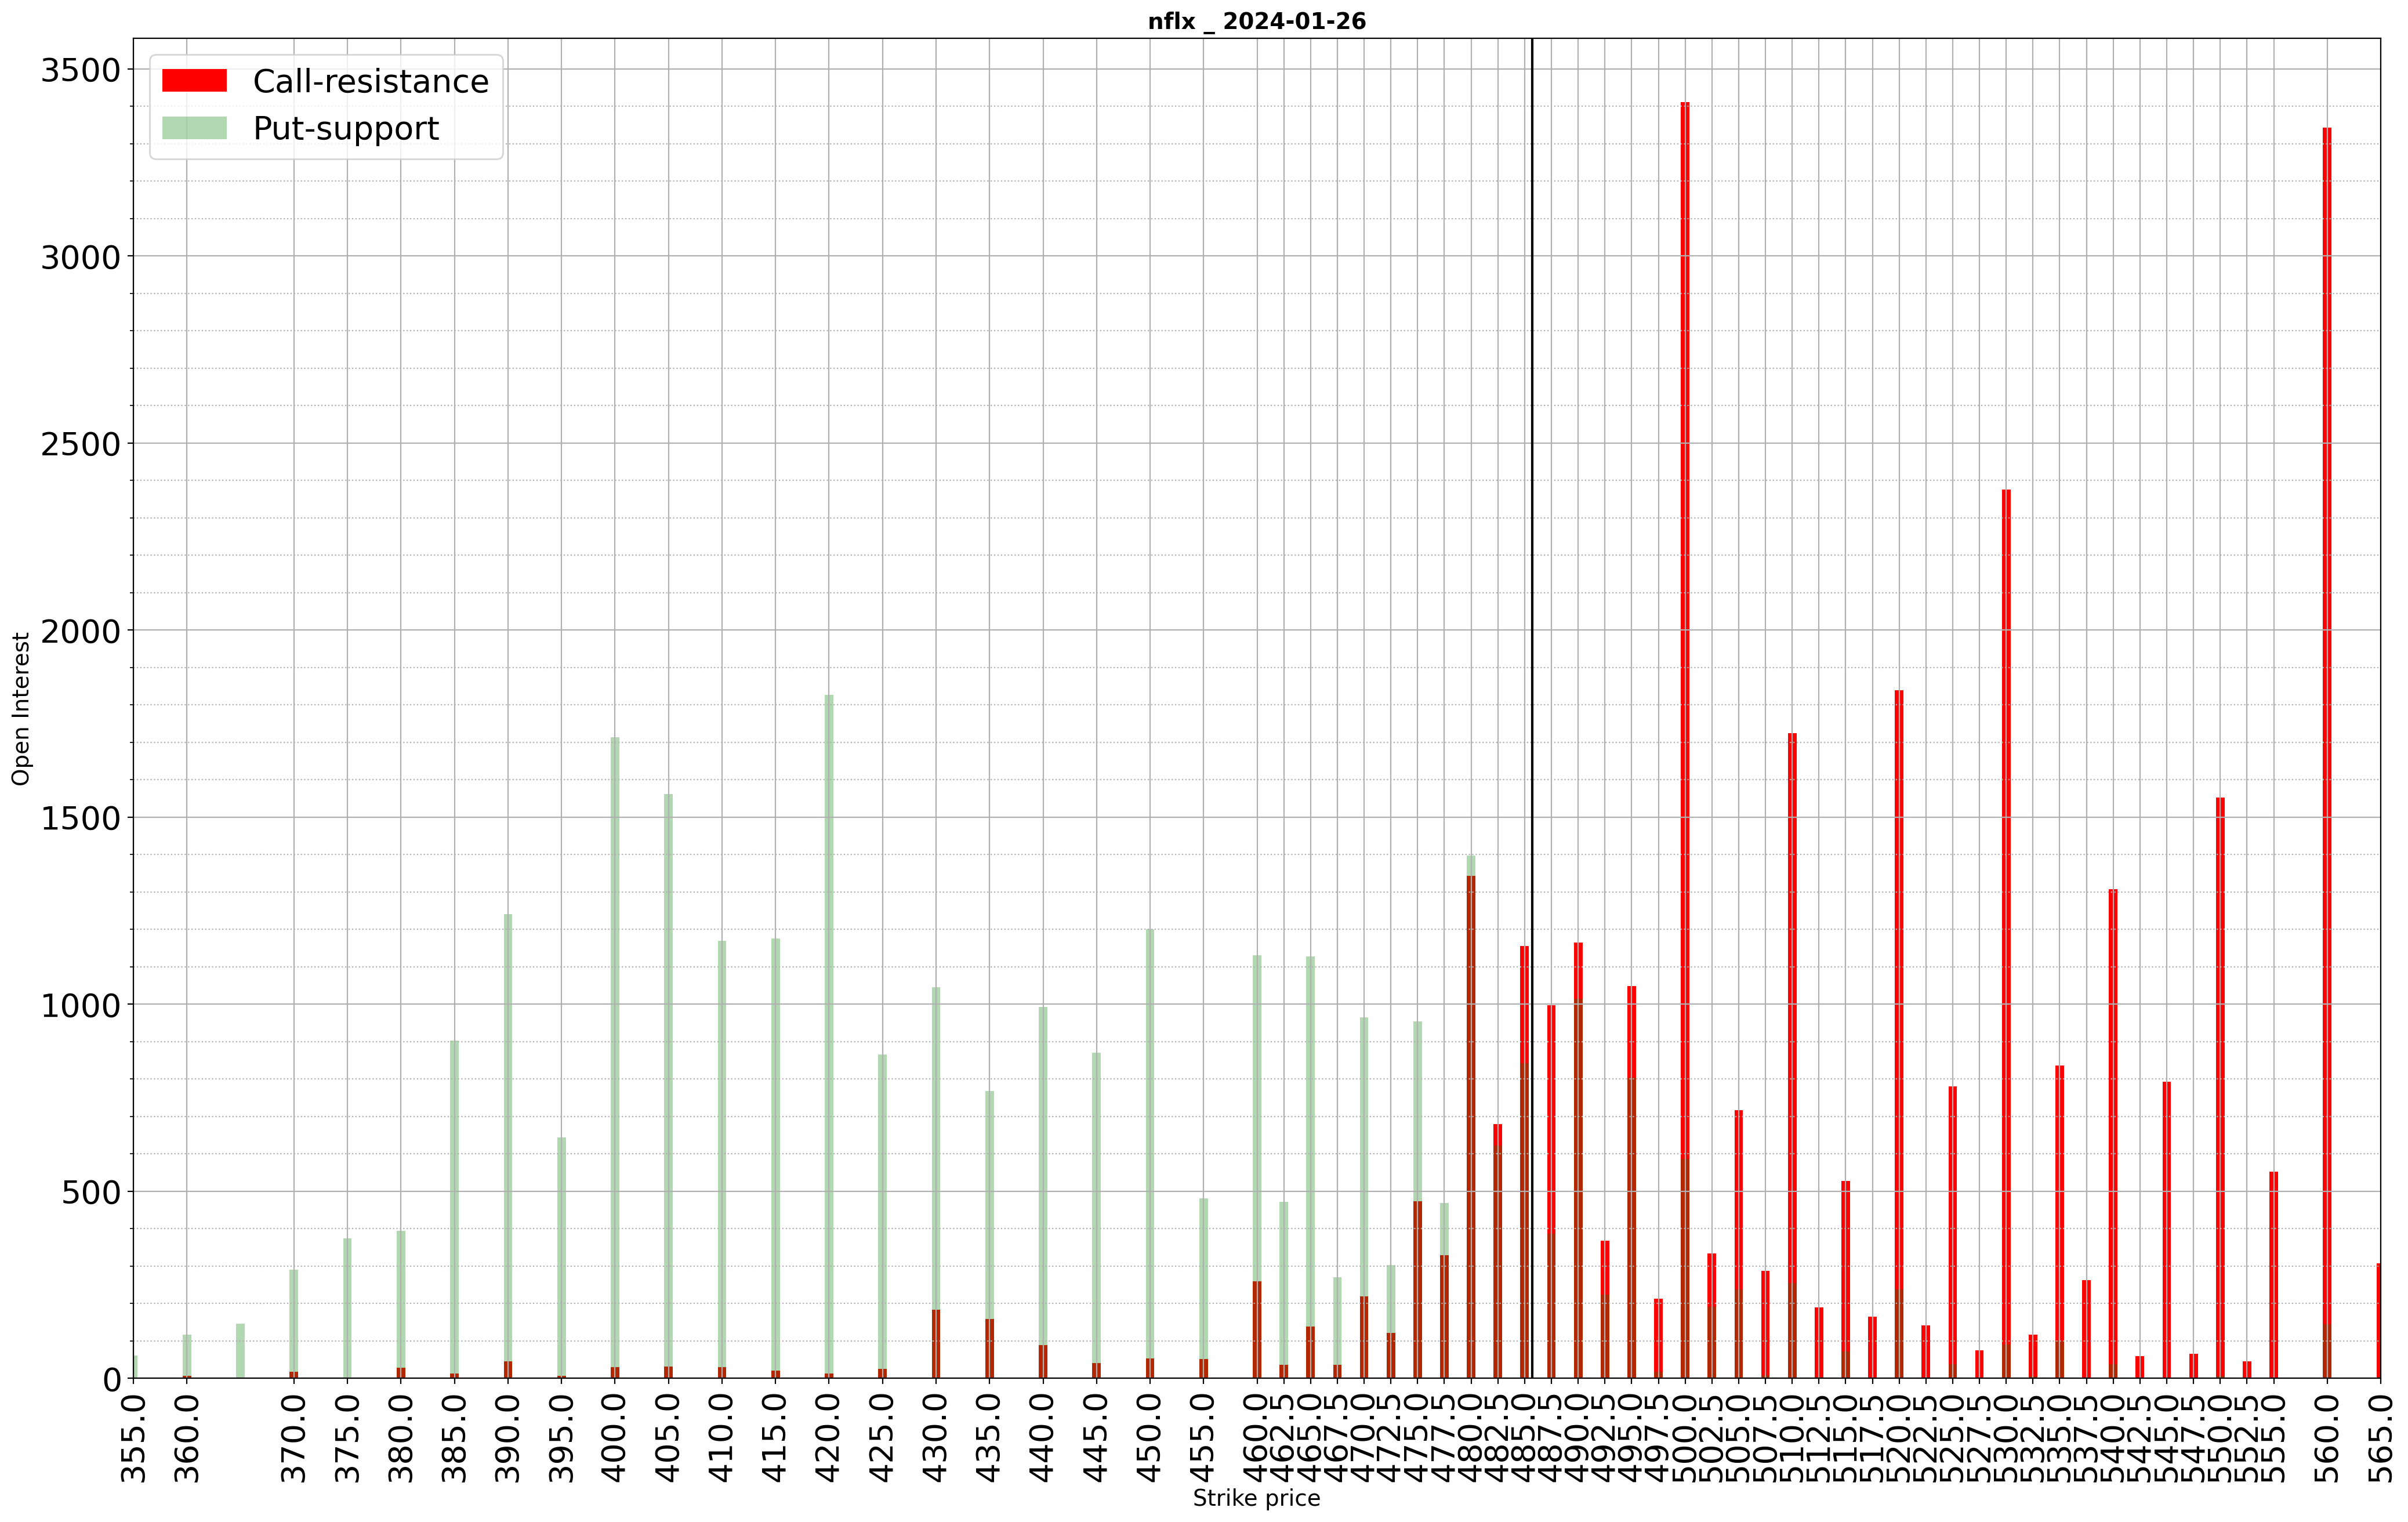

In [5]:
#date = '2024-01-19'
#symbols = ['SPY', 'ASML', 'META', 'AMZN', 'BABA', 'GOOGL', 'NXPI']
#symbols= ['acmr', 'adbe','alb', 'AMD', 'ARM', 'AVGO', 'crwd', 'etsy', 'fslr', 'FTNT', 'googl', 'meta', 'msft', 'nflx', 'NVDA', 'panw', 'pypl',  
#          'qcom', 'smci', 'tsla', 'ulta' ]
symbols = ['nflx']
for symbol in symbols:
    df = yf.Ticker(symbol)
    date = df.options[0]
    cmp = si.get_live_price(symbol)

    opt = df.option_chain(date)

    plt.figure(figsize = (25,15), dpi = 200)
 
######################################
    diff = 30
    i = np.abs(opt.calls['strike']-cmp).idxmin()
    size_ = opt.calls['strike'].size
    
    if i + diff >= size_:
        b = size_-1
    else:
        b = i + diff
        
    if i - diff <= 0:
        a = 0
    else:
        a = i - diff
###########################################

    plt.xticks(opt.calls['strike'], fontsize = 20, rotation = 90)
    plt.yticks(fontsize = 20)
    #plt.xlim([cmp-diff, cmp+diff])
    plt.xlim(opt.calls['strike'][a], opt.calls['strike'][b])
    plt.axvline(x = cmp,color = 'black')

    plt.bar(opt.calls['strike'], opt.calls['openInterest'], label = 'Call-resistance', color = 'red')
    plt.bar(opt.puts['strike'], opt.puts['openInterest'], label = 'Put-support', alpha = 0.3, color = 'green')
    plt.legend(fontsize = 20)

    plt.grid(linestyle = 'dotted', which = 'minor')
    plt.grid(which = 'major')
    plt.minorticks_on()
    
    plt.title(f'{symbol} _ {date}', weight='bold')
    
    plt.xlabel('Strike price')
    plt.ylabel('Open Interest')
    
    #savefig('Graph {0} ID {1}.jpg'.format(i+1, idx+1))
    
    #plt.legend()

    
    #plt.savefig(f'./{current_datetime} {symbol}.jpg')
    plt.show()
